## Import des librairies

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
import os

In [3]:
df = pd.read_csv("BostonHousing/housing.csv")

In [4]:
df.head(10)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [6]:
df.count()

RM         489
LSTAT      489
PTRATIO    489
MEDV       489
dtype: int64

In [8]:
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

## Visualisation de la distrbution

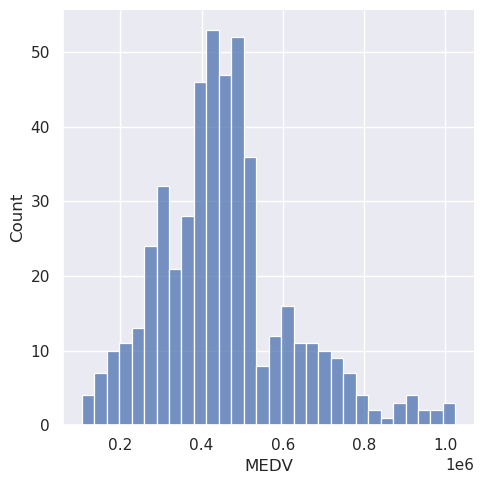

In [102]:
sns.set(rc={'figure.figsize':(5,5)})
sns.displot(df['MEDV'], bins=30)
plt.show()

## Recherche de correlation

In [103]:
tabcorr = df.corr()

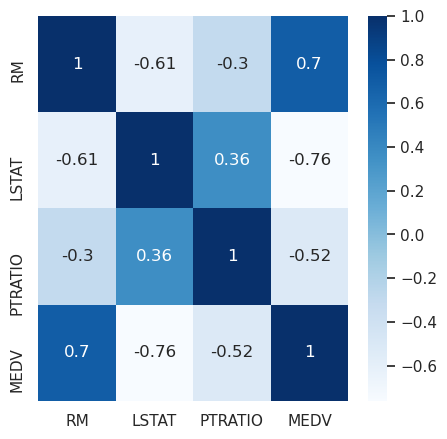

In [104]:
plt.figure(figsize=(5,5))
sns.heatmap(data=tabcorr, annot=True, cmap="Blues")
plt.show()

## linear plot

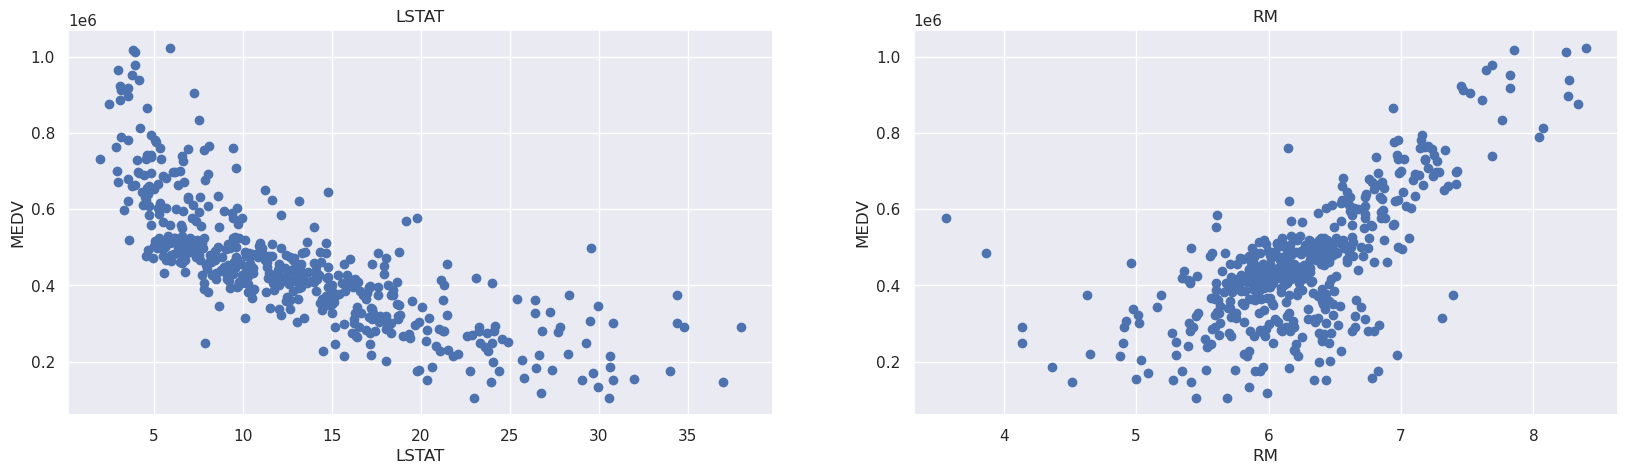

In [105]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    
plt.show()

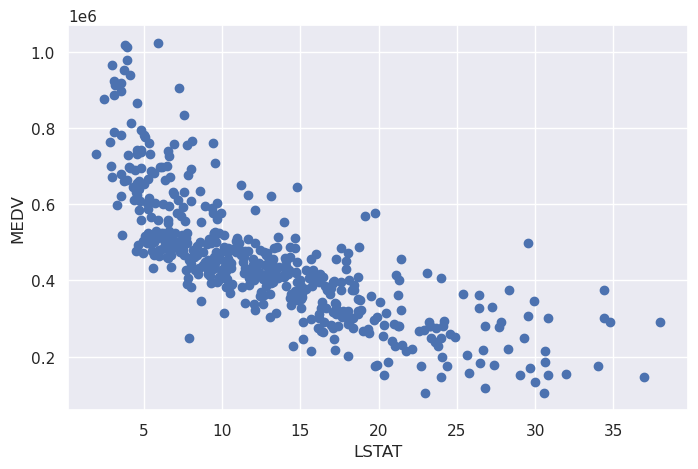

In [106]:
plt.figure(figsize=(8, 5))
plt.scatter(x=df['LSTAT'], y=df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

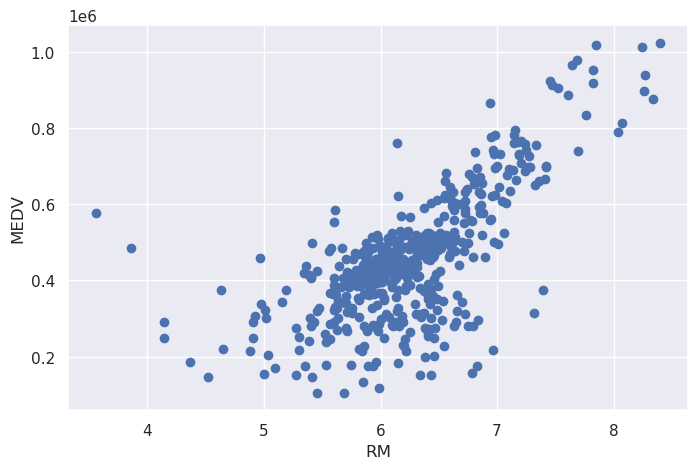

In [107]:
plt.figure(figsize=(8, 5))
plt.scatter(x=df['RM'], y=df['MEDV'], marker='o')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

## Regression lineaire

In [108]:
X = df.drop(['MEDV'], axis=1)
y = df.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [123]:
lm.predict(X_test[0:1])

array([304643.42627625])

In [111]:
scoreR2 = r2_score(y_test, y_pred)
print(scoreR2)

0.7042069943455352


## XGBRegressor

In [112]:
!pip install xgboost

In [113]:
import xgboost as XGB

In [114]:
xgb  = XGB.XGBRegressor()
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)

In [133]:
d = {'RM': [5.427], 'LSTAT': [18.14], 'PTRATIO': [20.2] }
test = pd.DataFrame(data=d)

In [135]:
xgb.predict(test)

array([281700.97], dtype=float32)

In [136]:
print(xgb.score(X_test,y_test))

0.8028070693746769


In [137]:
import pickle
 
# Save the model under the cwd
pkl_filename = "model_boston_housing_v1.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(xgb, file)